# Problem Set 2: FITS Files & Calibration Frames

<b>This assignment is to assist you in becoming familiar with the handling of fits files, a common 
astronomy data format (for both images and data tables) as well as with the basics of charge 
coupled device (CCD) data.</b>

For this assignment you can use whichever tool(s) you prefer - ds9, QFitsView, or astropy (or something else, if you prefer.) The description included has directions for ds9. 

By the end of this exercise, you should feel comfortable viewing and examining image data, understand the terminology we use to describe the data and the parts of the CCD, and begin to consider different causes of noise in data. 

This document is a list of directions and questions. Please turn in your answers on a separate PDF that is uploaded to Canvas. The PDF should include full written answers and any plots or screen grabs needed to justify your answers. Bold text are instructions. Italic text (also labeled with Q) are questions you should answer.

In [36]:
from IPython.display import display, HTML, Image

import numpy as np
import matplotlib.pyplot as plt
import astropy.visualization as vis
from astropy.io import fits

## Section 1: Examining Fits Files Using DS9

#### 1. Download the 4 necessary fits files from Canvas. 

First you are going to look at a flat field. Flat fields have been exposed to a source of light that 
illuminates the CCD (fairly) evenly across all the pixels. This helps us understand how individual 
pixels respond differently to similar stimulus. Understanding basic behavior of individual CCDs is 
important when we start to separate signal (the electrons that are generated from photons), from 
the noise.

#### 2.  Display flat.0012.fits. Set the scaling so you can see more than a flat image (feel free to change the color range if you’d like.) 

Q1: We’re using data from ARCTIC, an imager on the APO 3.5m. If you correctly adjust your scale, you might find some surprising features in this “flat”. Is it flat? What makes it not flat? Describe what you see

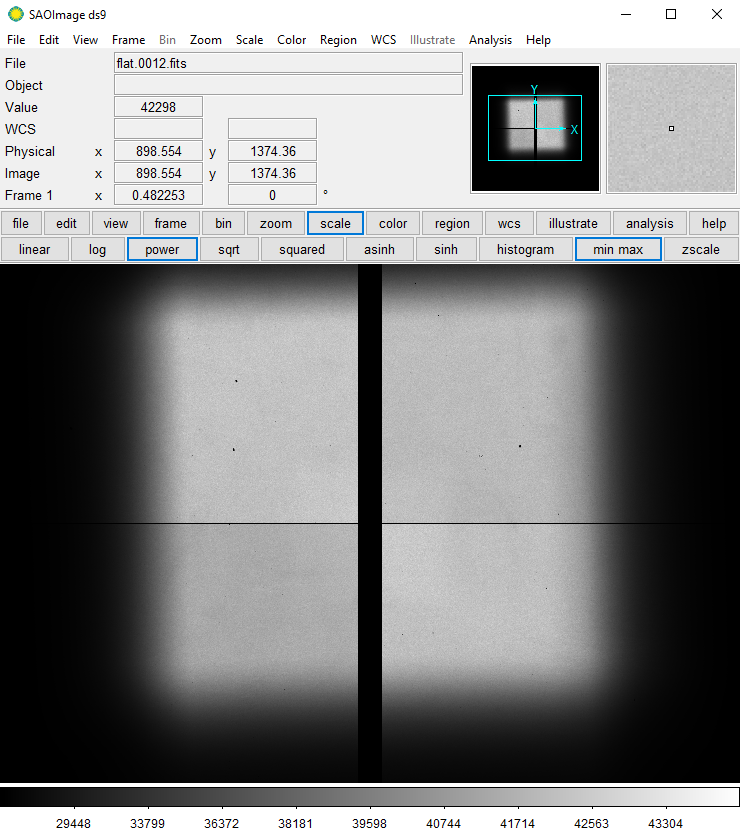

In [2]:
Image('Images/screenshot of flat in ds9.png', width=400)

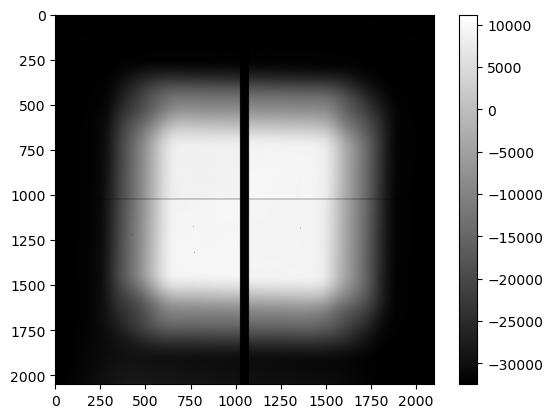

In [3]:
# Load the FITS file (closes automatically when done)
with fits.open('fits files/flat.0012.fits') as hdul: # param do_not_scale_image_data=True also works this way?
    hdul[0].scale('int16', bscale=1, bzero=32768) #32768
    # Display the image data
    plt.imshow(hdul[0].data, cmap='grey')
    plt.colorbar()
    plt.show()

This doesn't look like much! (Tried with DS9 first before even trying with Python) Including on DS9, all I was able to see was a white square with 2 perpendicular black lines. On the power scale (with both min/max and zscale) there was a little more grain but other than that there wasn't much. However the point of a flat is that it's supposed to be uniform (to calibrate away from error), so I would say that this picture isn't necessarily 100% flat since power scaling it shows that there's still noise. 

#### 3. Draw a test region. For this, we’ll use a box. Go to the “Region” menu, go down to shape, and select “Box”. Then draw a region on your chip.

#### 4.  Let’s examine what we can find out about the region you’ve selected. 

Under the “Region” menu, click on “Get Information”.  Explore under the “Analysis” menu. Can you make a histogram? Can you adjust its axes? Can you find a way to look at the statistics of the region? Can you figure out more than one way to see the standard deviation of your region?

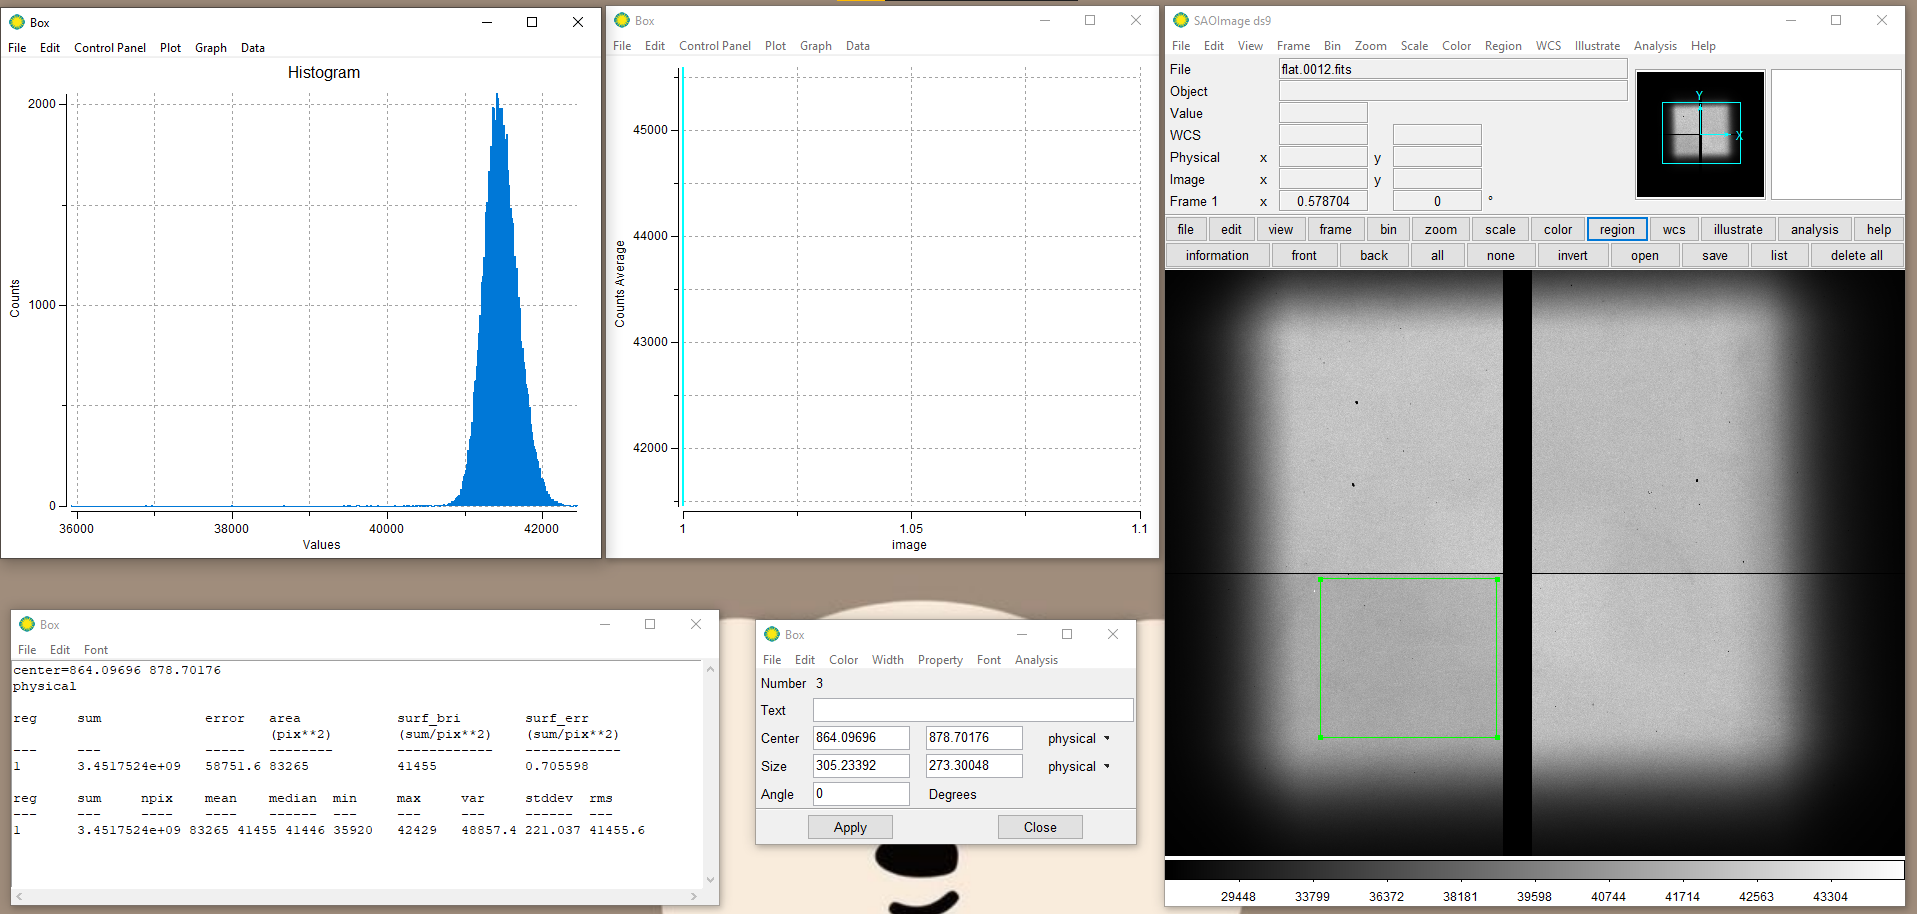

In [4]:
Image('Images/screenshot of using region feature.png', width = 1000)

Q2:  Measure at least three regions (at least one bias/overscan), and list them in data like the one below. The image regions should be ~10,000 pixels (area) - not giant, but not tiny. We want to have a good statistical sample.

|  Name   | Region (x, y) | Number of Pixels | Mean | Standard Deviation |
|:-------:|:-------------:|:----------------:|:----:|:------------------:|
|image|816.57696 831.32|147200|40642|1438.26| <?bottom left quadrant>
|overscan|1051.585 1026.584|147200|36659.1|14010.5| <?square centered on intersection of lines>

Q3: Plot this histograms of at least one image and one overscan region. Play with the plot ranges to best display the 
similarities and differences. Include the plots in your response. Do either of them look familiar? Do they look similar 
or different? Describe them

In [5]:
display(HTML(
    "<table><tr><td><img src='Images/histogram1.png'></td><td><img src='Images/histogram2.png'></td></tr></table>"
    ))

,


I selected the region on the last row of the table (left picture) and the region on the first row of the table (right picture). They look different from each other - the region on the right has higher counts on its histogram than the region on the left. The region on the left also has more outliers on the left of the spike in its histogram.

Q4: Now open bias.0002.fits . This is also from ARCTIC but is a bias frame - it hasn’t been exposed to light. 
Measure several regions, but this time just change the size of the region. Collect the data in a table like the one 
below.

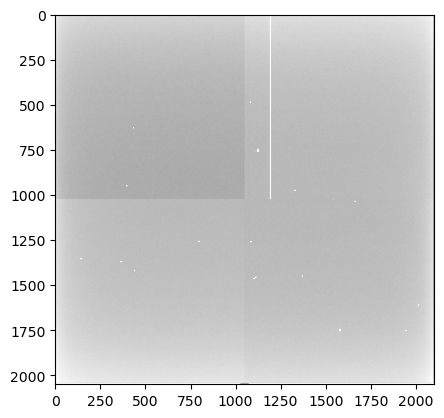

In [37]:
# opening the fits file
with fits.open('fits files/bias.0002.fits') as hdul:
    data = hdul[0].data
    data = np.nan_to_num(data.astype(float)) # Convert data to float type and replace NaN values
    norm = vis.ImageNormalize(data, interval=vis.ZScaleInterval(), stretch=vis.SqrtStretch()) # normalizing the image
    plt.imshow(data, cmap='grey', norm=norm) # plotting the image
    plt.show()

|  Name   | Region (x, y) | Number of Pixels | Mean | Standard Deviation |
|:-------:|:-------------:|:----------------:|:----:|:------------------:|
|Tiny|175.96433 28.805049|28220|356.994|2.52242|
|Small|175.95888 28.78434|92690|352.589|6.55395|
|Medium|175.93172 28.7145|338593|349.438|3.11978|
|Large|175.86547 28.738794|1151208|350.69|117.838|
|Extra Large|175.88393 28.774574|2567454|350.871|91.6053|

Q5:  Present the bias histograms and note how the histograms change from a small region to a large region. What do 
you think is happening with the distribution? Why? 


<!-- CSS -->
<style>
    .image-grid {
        display: grid;
        grid-template-columns: repeat(3, 1fr);
        column-gap: 10px;
        row-gap: 10px;
    }
    .image-grid img {
        width: 100%;
        height: auto;
    }
</style>

<!-- HTML -->
<div class="image-grid">
    <img src="Images/region locations.png">
    <img src="Images/tiny region histogram">
    <img src="Images/small region histogram">
    <img src="Images/medium region histogram">
    <img src="Images/large region histogram">
    <img src="Images/extra large region histogram">
</div>

The first picture shows where each region is located. From right to left (then top to bottom row), it's pretty noticeable how the histograms change between regions as the size increases. With the tiny region, it plots out as a nice, clean histogram... then has a drastic change as the region increases to the small size! Here, and onwards, there are a lot more outliers in the data which skews the nice bell curve of a typical histogram. These outliers also tend to be significantly higher in value than the peak of the curve, which essentially sits as close to x=0 as possible. Also, between region sizes, the height of the peak increases significantly. The reason why this is happening with the distribution is because the region selection is becoming less and less precise, which is supported by the change in standard deviations as recorded in the table. However, what's interesting is that the overall average value stays the same. Generally, I think this is a good indicator of how much impact noise can have on your telescope, especially when you start photographing at wider views, which opens it up more for the data to be contaminated by noise. 

## Section 2: Headers
One reason astronomers use fits files is because they can contain a great deal of information in 
various formats. We are going to see what we can extract from some image headers.

####  5. Open hcg79_m.0001.fits


['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'EXTEND', 'OBSERVAT', 'TELESCOP', 'INSTRUME', 'LATITUDE', 'LONGITUD', 'TIMESYS', 'UTC-TAI', 'UT1-TAI', 'LST', 'OBJNAME', 'RADECSYS', 'EQUINOX', 'OBJANGLE', 'RA', 'DEC', 'ARCOFFX', 'ARCOFFY', 'CALOFFX', 'CALOFFY', 'BOREOFFX', 'BOREOFFY', 'AIRPRESS', 'HUMIDITY', 'TELAZ', 'TELALT', 'TELROT', 'TELFOCUS', 'ZD', 'AIRMASS', 'FILENAME', 'CTYPE1', 'CTYPE2', 'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2', 'CD1_1', 'CD1_2', 'CD2_1', 'CD2_2', 'COMMENT', 'COMMENT', 'BZERO', 'BSCALE', 'DATE-OBS', 'FILPOS', 'FILTER', 'BEGX', 'BEGY', 'BINX', 'BINY', 'CCDBIN1', 'CCDBIN2', 'IMAGETYP', 'EXPTIME', 'READAMPS', 'READRATE', 'CCDHEAD', 'CCDTEMP', 'CCDHEAT', 'DIFFUPOS', 'DIFFUROT', 'AMPLIST', 'CSEC11', 'DSEC11', 'BSEC11', 'GTGAIN11', 'GTRON11', 'CSEC12', 'DSEC12', 'BSEC12', 'GTGAIN12', 'GTRON12', 'CSEC21', 'DSEC21', 'BSEC21', 'GTGAIN21', 'GTRON21', 'CSEC22', 'DSEC22', 'BSEC22', 'GTGAIN22', 'GTRON22']


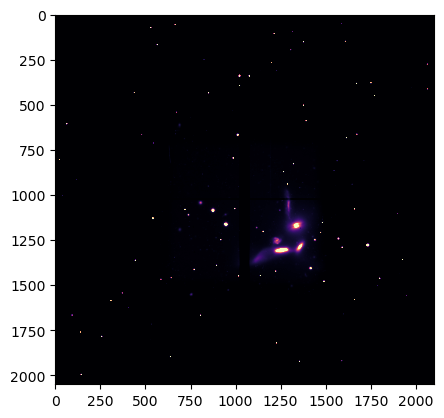

In [74]:
with fits.open('fits files/hcg79_m.0001.fits') as hdul:
    print(list(hdul[0].header))
    data = hdul[0].data
    data = np.nan_to_num(data.astype(float))
    vmin, vmax = np.percentile(data, [85, 99.93])
    norm = vis.ImageNormalize(data, vmin=vmin, vmax=vmax, interval=vis.ZScaleInterval(), stretch=vis.LinearStretch())
    plt.imshow(data, cmap='magma', norm=norm)
    plt.show()

Q6) Which telescope was used to take this image and at which observatory? Which instrument? Which filter?

In [78]:
display(
    hdul[0].header['OBSERVAT'], 
    hdul[0].header['INSTRUME'], 
    hdul[0].header['TELESCOP'],
    hdul[0].header['FILTER']
)

'APO'

'arctic'

'3.5m'

'Wash M'

Q7) What is the RA & Declination of HCG 79? Write what you find in the file, then check it in NED. Are they the same? 
Why do you think that is?

In [72]:
hdul[0].header['RA'], hdul[0].header['DEC']

('15:59:15.82', '20:44:36.00')

Q8) What was the detector temperature? What kind of object was being observed here?

In [86]:
hdul[0].header['CCDTEMP'], hdul[0].header['OBJNAME']

(150.4, 'HCG 79')

Q9)  Sketch the image you see, and describe (feel free to guess) the features. Some of them are astronomical, and some 
are instrumental. Can you separate the two? Label them in different colors.

<!-- CSS -->
<style>
    .image-grid {
        display: grid;
        grid-template-columns: repeat(3, 1fr);
        column-gap: 10px;
        row-gap: 10px;
    }
    .image-grid img {
        width: 100%;
        height: auto;
    }
</style>

<!-- HTML -->
<div class="image-grid">
    <img src="Images/hcg 79 sketch.png">
    <img src="Images/ds9 hcg 79.png">
</div>

Comparing the raw file exported from DS9 with the applied scaling using astropy, my guess is that the faint white box and the two perpendicular lines come from instrumental contamination. Otherwise, this one's not as messy and the nearby stars and galaxies are fairly visible - an easy fix with scaling (as you can see from my attempt with astropy).

#### 6. Open ngc2998.0042b.fits

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'OBSERVAT', 'TELESCOP', 'INSTRUME', 'LATITUDE', 'LONGITUD', 'TIMESYS', 'UTC-TAI', 'UT1-TAI', 'LST', 'OBJNAME', 'RADECSYS', 'EQUINOX', 'OBJANGLE', 'RA', 'DEC', 'ARCOFFX', 'ARCOFFY', 'CALOFFX', 'CALOFFY', 'BOREOFFX', 'BOREOFFY', 'AIRPRESS', 'HUMIDITY', 'TELAZ', 'TELALT', 'TELROT', 'TELFOCUS', 'ZD', 'AIRMASS', 'FILENAME', 'CTYPE1', 'CTYPE2', 'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2', 'CD1_1', 'CD1_2', 'CD2_1', 'CD2_2', 'IMAGETYP', 'DATE-OBS', 'EXPTIME', 'MASKPOS', 'SLITMASK', 'FILPOS', 'FILTER', 'TURRPOS', 'BSCALE', 'BZERO', 'DETECTOR', 'DARKTIME', 'CCDTEMP', 'CCDHEAT', 'GRATING', 'PIXSCAL2', 'DISPDW', 'DISPWC', 'LINESMM', 'BLAZEANG', 'CCDBIN1', 'CCDBIN2', 'CCDSUM', 'DISPAXIS', 'GAIN', 'RDNOISE', 'DETSIZE', 'DATASEC', 'BIASSEC']


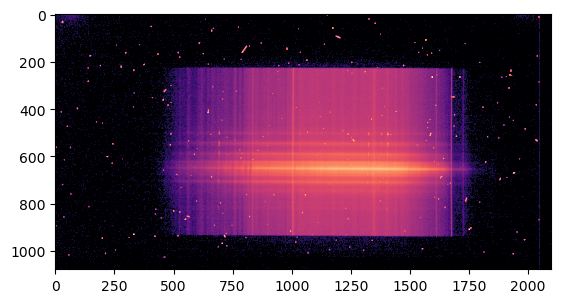

In [107]:
with fits.open('fits files/ngc2998.0042b.fits') as hdul:
    print(list(hdul[0].header))
    data = hdul[0].data
    data = np.nan_to_num(data.astype(float))
    vmin, vmax = np.percentile(data, [30, 99.99])
    norm = vis.ImageNormalize(data, vmin=vmin, vmax=vmax, interval=vis.ZScaleInterval(), stretch=vis.LogStretch())
    plt.imshow(data, cmap='magma', norm=norm)
    plt.show()

Q10) Which telescope was used to take this image and at which observatory? Which instrument? Which filter?

In [108]:
display(
    hdul[0].header['OBSERVAT'], 
    hdul[0].header['INSTRUME'], 
    hdul[0].header['TELESCOP'],
    hdul[0].header['FILTER']
)

'APO'

'DIS'

'3.5m'

'Empty'

Q11) What is the RA & Declination of NGC 2998? Write what you find in the file, then check it in NED. Are they the 
same? Why do you think that is?

In [109]:
hdul[0].header['RA'], hdul[0].header['DEC']

('9:48:43.63', '44:04:52.60')

Q12)  What was the detector temperature? What kind of object was being observed here? 

In [110]:
hdul[0].header['CCDTEMP'], hdul[0].header['OBJNAME']

(170.4, 'NGC 2998')

Q13) Sketch the image you see, and describe (feel free to guess) the features. Some of them are astronomical, and 
some are instrumental. Can you separate the two? Label them in different colors.

<!-- CSS -->
<style>
    .image-grid {
        display: grid;
        grid-template-columns: repeat(3, 1fr);
        column-gap: 10px;
        row-gap: 10px;
    }
    .image-grid img {
        width: 100%;
        height: auto;
    }
</style>

<!-- HTML -->
<div class="image-grid">
    <img src="Images/ngc 2998 sketch.png">
    <img src="Images/ds9 ngc 2998.png">
</div>

Comparing the raw file exported from DS9 and the applied scaling using astropy (at the start of this section), what we see is the stellar spectra of NGC 2998. Stellar spectra comes from how gas interferes with light and scatters it, so most of what is seen is astronomical. There are also some background objects that are visible. My guess, however, is that some of the vertical lines in the spectrum come from instrumental contamination, which could be a key piece of information in interpreting the specral lines. This one also wasn't too noisy to try and separate out data contamination (see my above attempt)